# Final Project - Connect 4

Joseph Larson, Joel Kraft, Spencer Lofing

In [51]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

state = [['R', 'B', 'R', 'B', 'R', 'B'], [], ['B'], [], [], [], []]

def printState(state):
    copystate = copy.deepcopy(state)
    for slot in copystate:
        slotlength = len(slot)
        for i in range(0, 6 - slotlength):
           slot.insert(0, 'X')

    for i in range(0, 6):
        temp = ''
        for slot in copystate:
            temp = temp + slot[i] + ' '
        print(temp)
    print()

def validMoves(state):
    listOfMoves = []
    for i in range(0, len(state)):
        if len(state[i]) < 6:
            listOfMoves.append(i)
    return listOfMoves

def makeMove(state, move, color):
    copystate = copy.deepcopy(state)
    copystate[move].insert(0, color)
    return copystate
    
def reachedGoalState(state):
    #Fill all slots for computation
    copystate = copy.deepcopy(state)
    for slot in copystate:
        slotlength = len(slot)
        for i in range(0, 6 - slotlength):
            slot.insert(0, 'X')

    #Vertical checks
    for slot in copystate:
        for i in range(0,3):
            if (slot[i] == slot[i+1]) & (slot[i] == slot[i+2]) & (slot[i] == slot[i+3]) & (slot[i] != 'X'):
                return 1

    #Horizontal checks
    for j in range(0,4):
        for i in range(0,len(copystate[0])):
            if (copystate[j][i] == copystate[j+1][i]) & (copystate[j][i] == copystate[j+2][i]) & \
                    (copystate[j][i] == copystate[j+3][i]) & (copystate[j][i] != 'X'):
                return 1

    #Diaganol up-right
    for i in range(0,4): #row
        for j in range(3,6): #column
            if (copystate[i][j] == copystate[i+1][j-1]) & (copystate[i][j] == copystate[i+2][j-2]) & \
                    (copystate[i][j] == copystate[i+3][j-3]) & (copystate[i][j] != 'X'):
                return 1

    # Diaganol up-left
    for i in range(0, 4):  # row
        for j in range(0, 3):  # column
            if (copystate[i][j] == copystate[i + 1][j + 1]) & (copystate[i][j] == copystate[i + 2][j + 2]) & \
                    (copystate[i][j] == copystate[i + 3][j + 3]) & (copystate[i][j] != 'X'):
                return 1
    #tie
    if (validMoves(state) == []):
        return -1
    #not a goal state
    return 0



def playgame(algorithm1MakeMove, algorithm2MakeMove, verbose=False):
    #Plays the game with algorithm1 making the first move
    #Will return a 1 if algorithm1 ('R') wins,
    #a 2 if algorithm2 ('B') wins, or
    #a 0 if a tie is reached
    #Returns (winner,number of moves)
    #Verbose =True will display the game board for every move

    state = [[],[],[],[],[],[],[]]
    count = 0;
    while(validMoves(state) != []):
        #'R' goes first
        NewState = algorithm1MakeMove(state,'R')
        count = count + 1
        if (verbose):
            printState(state)
        if reachedGoalState(NewState) == 1:
            return 1, count
        elif reachedGoalState(NewState) == -1:
            return 0, count
        else:
            state = NewState
        #'B' goes second
        NewState = algorithm2MakeMove(state, 'B')
        count = count + 1
        if (verbose):
            printState(state)
        if reachedGoalState(NewState) == 1:
            return 2,count
        elif reachedGoalState(NewState) == -1:
            return 0,count
        else:
            state = NewState

In [2]:
def userInputMakeMove(state,color):
    #Code will loop until a valid move is recieved

    #Print the board
    validInput = False
    while(validInput == False):
        printState(state)
        #print prompt and options
        print("You are: '" + color +"'")
        print("Possible Options: ")
        options = validMoves(state)
        print(options)
        choice = input("enter number of column (0-6) of desired move: ")

        #check fo a valid integer
        if (choice.isnumeric()):
            Inputchoice = int(choice)
            if ((Inputchoice < 7) & (Inputchoice >= 0) & (Inputchoice in options)):
                state = makeMove(state, Inputchoice, color)
                validInput = True

        if(validInput == False):
            print("ERROR: invlaid Entry")
            print("Try again. Input a number from 0-6 for desired column")
            print()
    return state

In [3]:
def randomPlayerMakeMove(state,color):
    options = validMoves(state)
    choice = random.choice(options)

    state=makeMove(state, choice, color)
    return state

In [4]:
printState(state)

R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
B X B X X X X 



The `playgame()` function takes the make move functions for two different algorithms in as inputs. The make move algorithms must take in the state and the color and return the new state after the move. The first function will go first in the game. The user can also play by useing the `userInputMakeMove()` method. The results are given in the format (winner, number of moves)

Example for user playing a random oponent is given below:

`(winner, moves) = playgame(randomPlayerMakeMove,userInputMakeMove,verboseOutput)`

In [81]:
playgame(makeMoveABPruning,makeQFunctionMove, True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X B 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
R X X X X X X 
R X X X X X B 

X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
R X X X X X X 
R X X X X X B 

X X X X X X X 
X X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
R X X X X X B 

X X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
R X X X X X B 

R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
R X X X X X B 

R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R X X X X X X 
R B X X X X B 

R X X X X X X 
B X X X X X X 
R X X X X X X 
B X X X X X X 
R R X X X X X 
R B X X X X B 

R X X X X X X 
B X X X X X X 
R X X X X X X 
B B X X X X X 
R R X X X X X 
R B X X X X B 


(1, 21)

In [6]:
playgame(randomPlayerMakeMove,randomPlayerMakeMove,True)

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X R X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B R X X X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B R X R X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X B X X X 
B R X R X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X B X X X 
B R X R X X X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X B X X X 
B R X R X B X 

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X R X X X 
X X X B X X X 
B R X R X B R 

X X X X X X X 
X X X X X X X 
X X X B X X X 
X X X R X X X 
X X X B X X X 
B R X R X B R 

X X X X X X X 
X X X X X X X 
X X X B X X X 
X X X R X X X 
X X X B X X X 
B R X R R B R 

X X X X X X X 
X X X X X X X 
X X X B X X X 
X X X R X X X 
B X X B X X X 
B R X R R B R 


(2, 24)

In [7]:
def stateMoveTuple(state, move, color) :
    return ((tuple(state[0]), tuple(state[1]), tuple(state[2]), tuple(state[3]), tuple(state[4]), tuple(state[5]), tuple(state[6])), move, color)

In [72]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF, startState = [[], [], [], [], [], [], []]) :
    epsilon = 1.0
    Q = {}
    steps = []
    
    for repetition in range(nRepetitions):
        epsilon *= epsilonDecayFactor
        step = 0
        state =  startState
        done = False
        while not done:
            #Blue's turn
            step += 1
            move = epsilonGreedy(epsilon, Q, state, validMovesF)
            stateNew = makeMove(state, move, 'B')
            if stateMoveTuple(state,move, 'B') not in Q:
                Q[stateMoveTuple(state,move, 'B')] = -1  # initial Q value for new board,move

            if reachedGoalState(stateNew):
                # solved!
                Q[stateMoveTuple(state,move, 'B')] = 0
                done = True
                
            elif len(validMovesF(stateNew)) is 0 : 
                done = True
                Q[stateMoveTuple(state,move, 'B')] = -1
                
            else : 
                # Red's turn
                validRedMoves = validMovesF(stateNew)
                moveO = random.choice(validRedMoves)
                stateNew = makeMoveF(state, moveO, 'R')
                if reachedGoalState(stateNew):
                    # solved for Red
                    Q[stateMoveTuple(state,move, 'B')] = -1
                    done = True
                
            if step > 1:
                Q[stateMoveTuple(stateOld,moveOld, 'B')] += learningRate * (-1 + Q[stateMoveTuple(state,move, 'B')] - Q[stateMoveTuple(stateOld,moveOld, 'B')])

            stateOld, moveOld = state, move # remember board and move to Q(board,move) can be updated after next steps
            state = stateNew
        steps.append(step)
    return Q, np.array(steps)

In [13]:
def epsilonGreedy(epsilon, Q, state, validMovesF):
    validMoves = validMovesF(state)
    if np.random.uniform() < epsilon:
        # Random Move
        return validMoves[np.random.choice(len(validMoves))]
    else:
        # Greedy Move
        Qs = np.array([Q.get(stateMoveTuple(state, m, 'B'), 0) for m in validMoves]) 
        return validMoves[ np.argmax(Qs) ]

In [48]:
def makeQFunctionMove(state, color):
    validMovesOptions = validMoves(state)
    Qs = np.array([Q.get(stateMoveTuple(state, m, 'B'), 0) for m in validMovesOptions]) 
    moveToMake = validMovesOptions[ np.argmax(Qs) ]
    newState=makeMove(state, moveToMake, color)
    return newState

In [14]:
def testQ(Q, maxSteps, validMovesF, makeMoveF, startState = [[], [], [], [], [], [], []]) : 
    state = startState
    listOfStates = []

    for steps in range(maxSteps) : 
        listOfStates.append(state)
        move = epsilonGreedy(0, Q, state, validMovesF)
        stateNew = makeMoveF(state, move, 'B')
        state = stateNew
        if reachedGoalState(stateNew) :
            listOfStates.append(stateNew)
            return listOfStates
        
        validRedMoves = validMovesF(stateNew)
        moveRed = validRedMoves[np.random.choice(len(validRedMoves))]
        statePostRed = makeMoveF(state, moveRed, 'R')
        state = statePostRed
        if reachedGoalState(stateNew):
            return listOfStates
    return []

In [77]:
Q, stepsToGoal = trainQ(10000, 0.2, 0.9, validMoves, makeMove)

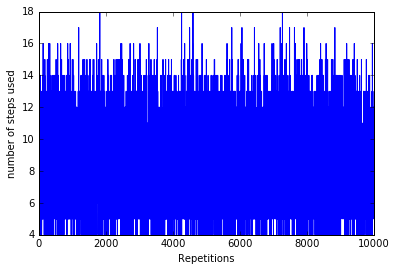

In [78]:
plt.plot(stepsToGoal)
plt.ylabel('number of steps used')
plt.xlabel('Repetitions')
plt.show()

In [79]:
path = testQ(Q, 20, validMoves, makeMove)

In [80]:
for s in path:
    printState(s)
    print()

X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 


X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X B X R X X 


X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X R X X 
B X B X R X X 


X X X X X X X 
X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X R X X 
B R B X R X X 


X X X X X X X 
X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X R X X 
B R B X R R X 


X X X X X X X 
X X X X X X X 
B X X X X X X 
B X X X X X X 
B X X X R X X 
B R B X R R X 




In [61]:
def getUtility(state, color):
    copystate = copy.deepcopy(state)
    for slot in copystate:
        slotlength = len(slot)
        for i in range(0, 6 - slotlength):
            slot.insert(0, 'X')

    # Vertical checks
    for slot in copystate:
        for i in range(0, 3):
            if (slot[i] == slot[i + 1]) & (slot[i] == slot[i + 2]) & (slot[i] == slot[i + 3]) & (slot[i] != 'X'):
                if slot[i] == color:
                    return 1
                else:
                    return -1

    # Horizontal checks
    for j in range(0, 4):
        for i in range(0, len(copystate[0])):
            if (copystate[j][i] == copystate[j + 1][i]) & (copystate[j][i] == copystate[j + 2][i]) & \
                    (copystate[j][i] == copystate[j + 3][i]) & (copystate[j][i] != 'X'):
                if copystate[j][i] == color:
                    return 1
                else:
                    return -1

    # Diaganol up-right
    for i in range(0, 4):  # row
        for j in range(3, 6):  # column
            if (copystate[i][j] == copystate[i + 1][j - 1]) & (copystate[i][j] == copystate[i + 2][j - 2]) & \
                    (copystate[i][j] == copystate[i + 3][j - 3]) & (copystate[i][j] != 'X'):
                if copystate[i][j] == color:
                    return 1
                else:
                    return -1

    # Diaganol up-left
    for i in range(0, 4):  # row
        for j in range(0, 3):  # column
            if (copystate[i][j] == copystate[i + 1][j + 1]) & (copystate[i][j] == copystate[i + 2][j + 2]) & \
                    (copystate[i][j] == copystate[i + 3][j + 3]) & (copystate[i][j] != 'X'):
                if copystate[i][j] == color:
                    return 1
                else:
                    return -1

    # not a goal state or a tie
    return 0

`getUtility(state, color)` is a helper function for `negamaxab(state, depthLeft, alpha, beta, color)` which returns a 1 if the current state is a win for the provided color, a -1 if the current state is a loss for the provided color, and a 0 if the current state is a tie or a non-winning or non-losing state.

In [57]:
def negamaxab(state, depthLeft, alpha, beta, color):
    opponentColor = 'R'
    if color == 'R':
        opponentColor = 'B'
    if reachedGoalState(state) == 1 or depthLeft == 0:
        return getUtility(state, color), None
    bestValue, bestMove = None, None
    for move in validMoves(state):
        newState = makeMove(state, move, color)
        value, _ = negamaxab(newState, depthLeft-1, -beta, -alpha, opponentColor)
        #game.unmakeMove(move)
        if value is None:
            continue
        value = -value
        if bestValue is None or value > bestValue:
            bestValue, bestMove = value, move
        if value > alpha:
            alpha = value
        if alpha >= beta:
            return alpha, bestMove
    return bestValue, bestMove

In [58]:
def negamaxIDSab(state, color, depthLimit):
    for depth in range(depthLimit+1):
        alpha = -float("inf")
        beta = float("inf")
        bestValue, bestMove = negamaxab(state, depth, alpha, beta, color)
        if bestValue is 1:
            return bestValue, bestMove
        elif depth is depthLimit:
            return bestValue, bestMove

`negamaxIDSab(state, color, depthLimit)` is a variant of `negamaxab(state, depthLeft, alpha, beta, color)` which iteratively searches through depth levels of possible moves and returns the best value (1 for a win, -1 for a loss, and 0 for a tie/unresolved state) and the best move to take which corresponds with that value

In [59]:
def makeMoveABPruning(state, color):
    _, move = negamaxIDSab(state, color, 7)
    state = makeMove(state, move, color)
    return state

`makeMoveABPruning(state, color)` is a function that returns the current best move as determined by `negamaxIDSab(state, color, depthLimit)` where depth limit is set at 7. However, the depth can be edited easily to make the makeMove function better or worse at choosing next moves.